#### Time Series Analysis of S&P 500, Unemployment Rate, and Participation Rate data pulled from FRED api

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns',500)
color_pallete = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

In [3]:
fred_api_key = 'cc7d043a5a1cb7c9d95ec921d4ad5b26'

In [4]:
#Create Fred object

fred = Fred(api_key=fred_api_key)

In [5]:
#Search Data from Fred

df_sp_search = fred.search('S&P',order_by='popularity')
df_sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-08-14,2025-08-14,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-08-12,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-08-13 06:52:10-05:00,98,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2025-08-14,2025-08-14,S&P 500,2015-08-14,2025-08-13,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-08-13 19:01:51-05:00,89,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2025-08-14,2025-08-14,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-07-29 08:11:24-05:00,86,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-08-14,2025-08-14,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-08-12,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-08-13 06:52:14-05:00,85,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-08-14,2025-08-14,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-08-12,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-08-13 06:59:01-05:00,82,The ICE BofA Option-Adjusted Spreads (OASs) ar...


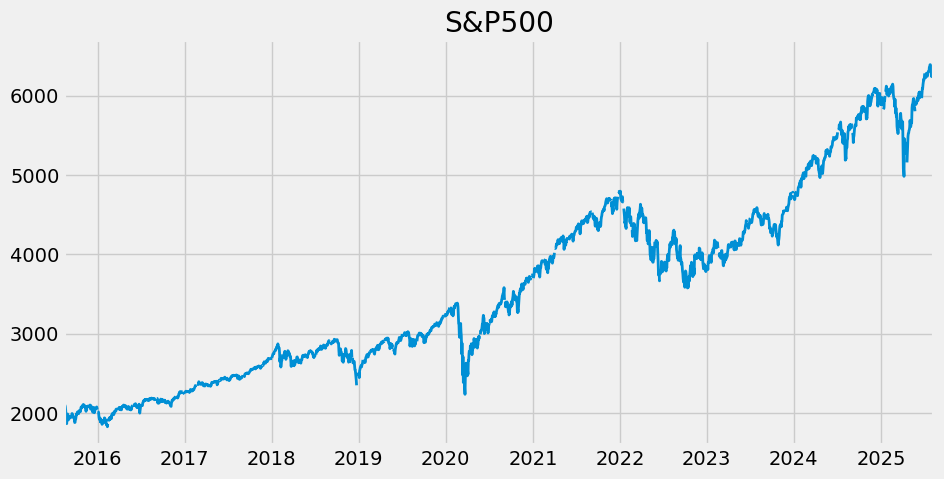

In [13]:
#Pulling data and plotting it

df_sp500 = fred.get_series('SP500')
df_sp500.plot(figsize=(10,5), title='S&P500', lw=2 )
plt.show()

In [101]:
#Pull and join multiple data series
#Getting unemployment rate of each state
df_employment_search = fred.search('Unemployment rate state')
df_employment_search = df_employment_search.query('frequency == "Monthly" and seasonal_adjustment== "Seasonally Adjusted" and units == "Percent" ')
df_employment_search = df_employment_search.loc[df_employment_search['title'].str.contains('Unemployment Rate in')]
df_employment_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2025-08-14,2025-08-14,Unemployment Rate in California,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:48:08-05:00,63,None
NYUR,NYUR,2025-08-14,2025-08-14,Unemployment Rate in New York,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:47:33-05:00,52,None
TXUR,TXUR,2025-08-14,2025-08-14,Unemployment Rate in Texas,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:47:42-05:00,52,None
FLUR,FLUR,2025-08-14,2025-08-14,Unemployment Rate in Florida,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:48:13-05:00,50,None
MIUR,MIUR,2025-08-14,2025-08-14,Unemployment Rate in Michigan,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:47:23-05:00,43,None
OHUR,OHUR,2025-08-14,2025-08-14,Unemployment Rate in Ohio,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:47:34-05:00,40,None
PAUR,PAUR,2025-08-14,2025-08-14,Unemployment Rate in Pennsylvania,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:47:36-05:00,39,None
ALUR,ALUR,2025-08-14,2025-08-14,Unemployment Rate in Alabama,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:48:04-05:00,38,None
MAUR,MAUR,2025-08-14,2025-08-14,Unemployment Rate in Massachusetts,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-21 09:47:21-05:00,38,None


In [102]:
#Dropping irrelevant rows
df_employment_search.drop('LASMT261982000000003',axis=0,inplace=True)
df_employment_search.drop('DCUR',axis=0,inplace=True)

In [103]:
#Adding each series of dataframe by state into a list. So you will have a list of dataframes containing unemployment rate of each state
unemployement_state_list = []
for i in df_employment_search.index:
    result = fred.get_series(i).to_frame(name=i) #getseries is returning a series, you need to convert it to a dataframe, by default name would be 0
    unemployement_state_list.append(result)
unemployement_state_list

[            CAUR
 1976-01-01   9.2
 1976-02-01   9.2
 1976-03-01   9.1
 1976-04-01   9.0
 1976-05-01   8.9
 ...          ...
 2025-02-01   5.4
 2025-03-01   5.3
 2025-04-01   5.3
 2025-05-01   5.3
 2025-06-01   5.4
 
 [594 rows x 1 columns],
             NYUR
 1976-01-01  10.3
 1976-02-01  10.3
 1976-03-01  10.2
 1976-04-01  10.2
 1976-05-01  10.2
 ...          ...
 2025-02-01   4.3
 2025-03-01   4.2
 2025-04-01   4.2
 2025-05-01   4.0
 2025-06-01   4.0
 
 [594 rows x 1 columns],
             TXUR
 1976-01-01   5.8
 1976-02-01   5.8
 1976-03-01   5.9
 1976-04-01   5.9
 1976-05-01   6.0
 ...          ...
 2025-02-01   4.1
 2025-03-01   4.1
 2025-04-01   4.1
 2025-05-01   4.1
 2025-06-01   4.0
 
 [594 rows x 1 columns],
             FLUR
 1976-01-01   9.6
 1976-02-01   9.7
 1976-03-01   9.6
 1976-04-01   9.5
 1976-05-01   9.3
 ...          ...
 2025-02-01   3.6
 2025-03-01   3.6
 2025-04-01   3.7
 2025-05-01   3.7
 2025-06-01   3.7
 
 [594 rows x 1 columns],
             MIUR
 1976-01-0

In [149]:
#Stacking each element (dataframe) of the list side by side
df_unemployement_state = pd.concat(unemployement_state_list, axis=1)
df_unemployement_state

,CAUR,NYUR,TXUR,FLUR,MIUR,OHUR,PAUR,ALUR,MAUR,VAUR,GAUR,ILUR,NJUR,NCUR,COUR,NVUR,AZUR,WAUR,WIUR,MNUR,TNUR,ORUR,KYUR,MOUR,MDUR,INUR,NDUR,WVUR
1976-01-01,9.2,10.3,5.8,9.6,9.9,8.1,8.1,6.7,10.6,6.0,8.4,6.6,10.2,6.5,5.8,9.2,10.2,8.5,5.8,5.9,6.0,9.5,5.6,6.0,6.5,6.6,3.5,7.4
1976-02-01,9.2,10.3,5.8,9.7,9.9,8.1,8.1,6.6,10.6,6.0,8.4,6.6,10.2,6.5,5.8,9.2,10.2,8.5,5.8,5.9,6.0,9.5,5.6,6.0,6.5,6.6,3.5,7.4
1976-03-01,9.1,10.2,5.9,9.6,9.9,8.1,8.1,6.6,10.6,6.0,8.3,6.6,10.2,6.5,5.7,9.2,10.2,8.5,5.8,5.8,6.0,9.4,5.6,6.0,6.5,6.5,3.5,7.4
1976-04-01,9.0,10.2,5.9,9.5,9.8,7.9,8.1,6.5,10.4,5.9,8.2,6.6,10.3,6.3,5.6,9.0,10.0,8.5,5.7,5.7,6.0,9.3,5.6,6.0,6.5,6.3,3.6,7.4
1976-05-01,8.9,10.2,6.0,9.3,9.6,7.8,8.1,6.4,10.1,5.8,8.1,6.6,10.3,6.1,5.6,8.8,9.8,8.5,5.6,5.6,5.9,9.1,5.5,6.0,6.6,6.0,3.6,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,5.4,4.3,4.1,3.6,5.4,4.7,3.8,3.3,4.3,3.1,3.6,4.8,4.6,3.7,4.7,5.8,3.9,4.4,3.2,3.0,3.7,4.5,5.3,3.7,3.0,4.3,2.6,3.9
2025-03-01,5.3,4.2,4.1,3.6,5.5,4.8,3.8,3.3,4.4,3.2,3.6,4.8,4.7,3.7,4.8,5.7,4.1,4.4,3.2,3.1,3.6,4.6,5.2,3.8,3.0,4.1,2.6,3.8
2025-04-01,5.3,4.2,4.1,3.7,5.5,4.9,3.9,3.3,4.6,3.3,3.6,4.8,4.8,3.7,4.8,5.6,4.1,4.4,3.3,3.2,3.5,4.7,5.2,3.9,3.1,3.9,2.6,3.8
2025-05-01,5.3,4.0,4.1,3.7,5.4,4.9,3.9,3.3,4.8,3.4,3.5,4.8,4.8,3.7,4.8,5.5,4.1,4.5,3.3,3.3,3.5,4.8,5.0,4.0,3.2,3.7,2.5,3.7


In [105]:
#Replacing state abbreviation with state name in the graph
df_employment_search['state'] = df_employment_search['title'].str.replace('Unemployment Rate in ','')
id_to_state = df_employment_search['state'].to_dict()
id_to_state
df_unemployement_state.columns = [id_to_state[index] for index in df_unemployement_state.columns]

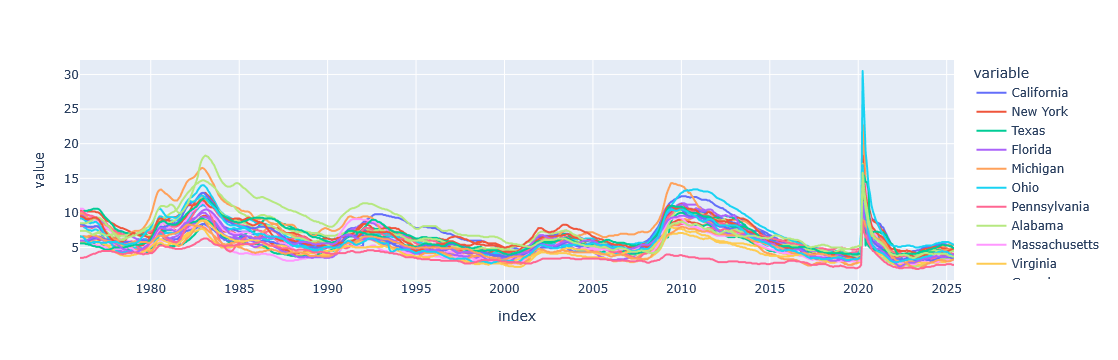

In [106]:

#Plotting the data
px.line(df_unemployement_state)

Unemployement Rate peaked in 2020. The state that was most affected was Nevada.
Las Vegas (in Nevada) is a famous tourist spot. Lockdowns would have led to loss of livelihood

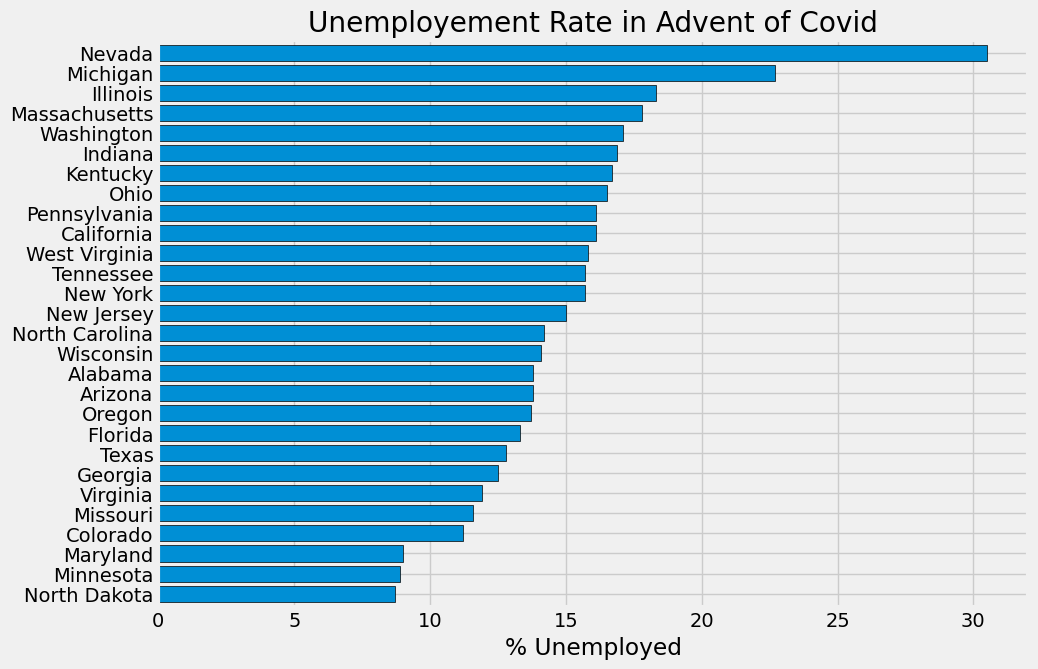

In [112]:
#Plotting unemployment rate at the peak in 2020 by state
chart = df_unemployement_state.iloc[df_unemployement_state.index == '2020-04-01'].T \
                .sort_values('2020-04-01') \
                .plot(kind= 'barh', figsize=(10,7), width=0.8, edgecolor='black', title='Unemployement Rate in Advent of Covid')
chart.legend().remove()
chart.set_xlabel('% Unemployed')
plt.show()

In [117]:
#Getting Participation Rate
df_participation_search = fred.search('Participation rate state')
df_participation_search = df_participation_search.query('frequency == "Monthly" and seasonal_adjustment== "Seasonally Adjusted" and units == "Percent" ')
df_participation_search = df_participation_search.loc[df_participation_search['title'].str.contains('Participation Rate for')]
df_participation_search
 


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2025-08-14,2025-08-14,Labor Force Participation Rate for California,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:12-05:00,22,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2025-08-14,2025-08-14,Labor Force Participation Rate for Florida,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:13-05:00,20,A state's labor-force participation rate is th...
LBSSA25,LBSSA25,2025-08-14,2025-08-14,Labor Force Participation Rate for Massachusetts,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:15-05:00,18,A state's labor-force participation rate is th...
LBSSA22,LBSSA22,2025-08-14,2025-08-14,Labor Force Participation Rate for Louisiana,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:15-05:00,18,A state's labor-force participation rate is th...
LBSSA39,LBSSA39,2025-08-14,2025-08-14,Labor Force Participation Rate for Ohio,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:18-05:00,16,A state's labor-force participation rate is th...
LBSSA48,LBSSA48,2025-08-14,2025-08-14,Labor Force Participation Rate for Texas,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:19-05:00,16,A state's labor-force participation rate is th...
LBSSA51,LBSSA51,2025-08-14,2025-08-14,Labor Force Participation Rate for Virginia,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:20-05:00,17,A state's labor-force participation rate is th...
LBSSA55,LBSSA55,2025-08-14,2025-08-14,Labor Force Participation Rate for Wisconsin,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:20-05:00,17,A state's labor-force participation rate is th...
LBSSA13,LBSSA13,2025-08-14,2025-08-14,Labor Force Participation Rate for Georgia,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:13-05:00,16,A state's labor-force participation rate is th...


In [136]:
df_participation_search['state']=df_participation_search['title'].str.replace('Labor Force Participation Rate for ','')


#Getting only the rows for the states that are in the employment data as well
df_participation_search = df_participation_search[df_participation_search['state'].isin(df_employment_search['state'].to_list())]
df_participation_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes,state
series id,,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2025-08-14,2025-08-14,Labor Force Participation Rate for California,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:12-05:00,22,A state's labor-force participation rate is th...,California
LBSSA12,LBSSA12,2025-08-14,2025-08-14,Labor Force Participation Rate for Florida,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:13-05:00,20,A state's labor-force participation rate is th...,Florida
LBSSA25,LBSSA25,2025-08-14,2025-08-14,Labor Force Participation Rate for Massachusetts,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:15-05:00,18,A state's labor-force participation rate is th...,Massachusetts
LBSSA39,LBSSA39,2025-08-14,2025-08-14,Labor Force Participation Rate for Ohio,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:18-05:00,16,A state's labor-force participation rate is th...,Ohio
LBSSA48,LBSSA48,2025-08-14,2025-08-14,Labor Force Participation Rate for Texas,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:19-05:00,16,A state's labor-force participation rate is th...,Texas
LBSSA51,LBSSA51,2025-08-14,2025-08-14,Labor Force Participation Rate for Virginia,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:20-05:00,17,A state's labor-force participation rate is th...,Virginia
LBSSA55,LBSSA55,2025-08-14,2025-08-14,Labor Force Participation Rate for Wisconsin,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:20-05:00,17,A state's labor-force participation rate is th...,Wisconsin
LBSSA13,LBSSA13,2025-08-14,2025-08-14,Labor Force Participation Rate for Georgia,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:13-05:00,16,A state's labor-force participation rate is th...,Georgia
LBSSA17,LBSSA17,2025-08-14,2025-08-14,Labor Force Participation Rate for Illinois,1976-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-18 09:01:14-05:00,12,A state's labor-force participation rate is th...,Illinois


In [137]:
participation_state_list = []
for i in df_participation_search.index:
    result = fred.get_series(i).to_frame(name=i) #getseries is returning a series, you need to convert it to a dataframe, by default name would be 0
    participation_state_list.append(result)


In [138]:
#Stacking each element (dataframe) of the list side by side
df_participation_state = pd.concat(participation_state_list, axis=1)

In [139]:
#Replacing state abbreviation with state name in the graph
participation_id_to_state = df_participation_search['state'].to_dict()
participation_id_to_state
df_participation_state.columns = [participation_id_to_state[index] for index in df_participation_state.columns]

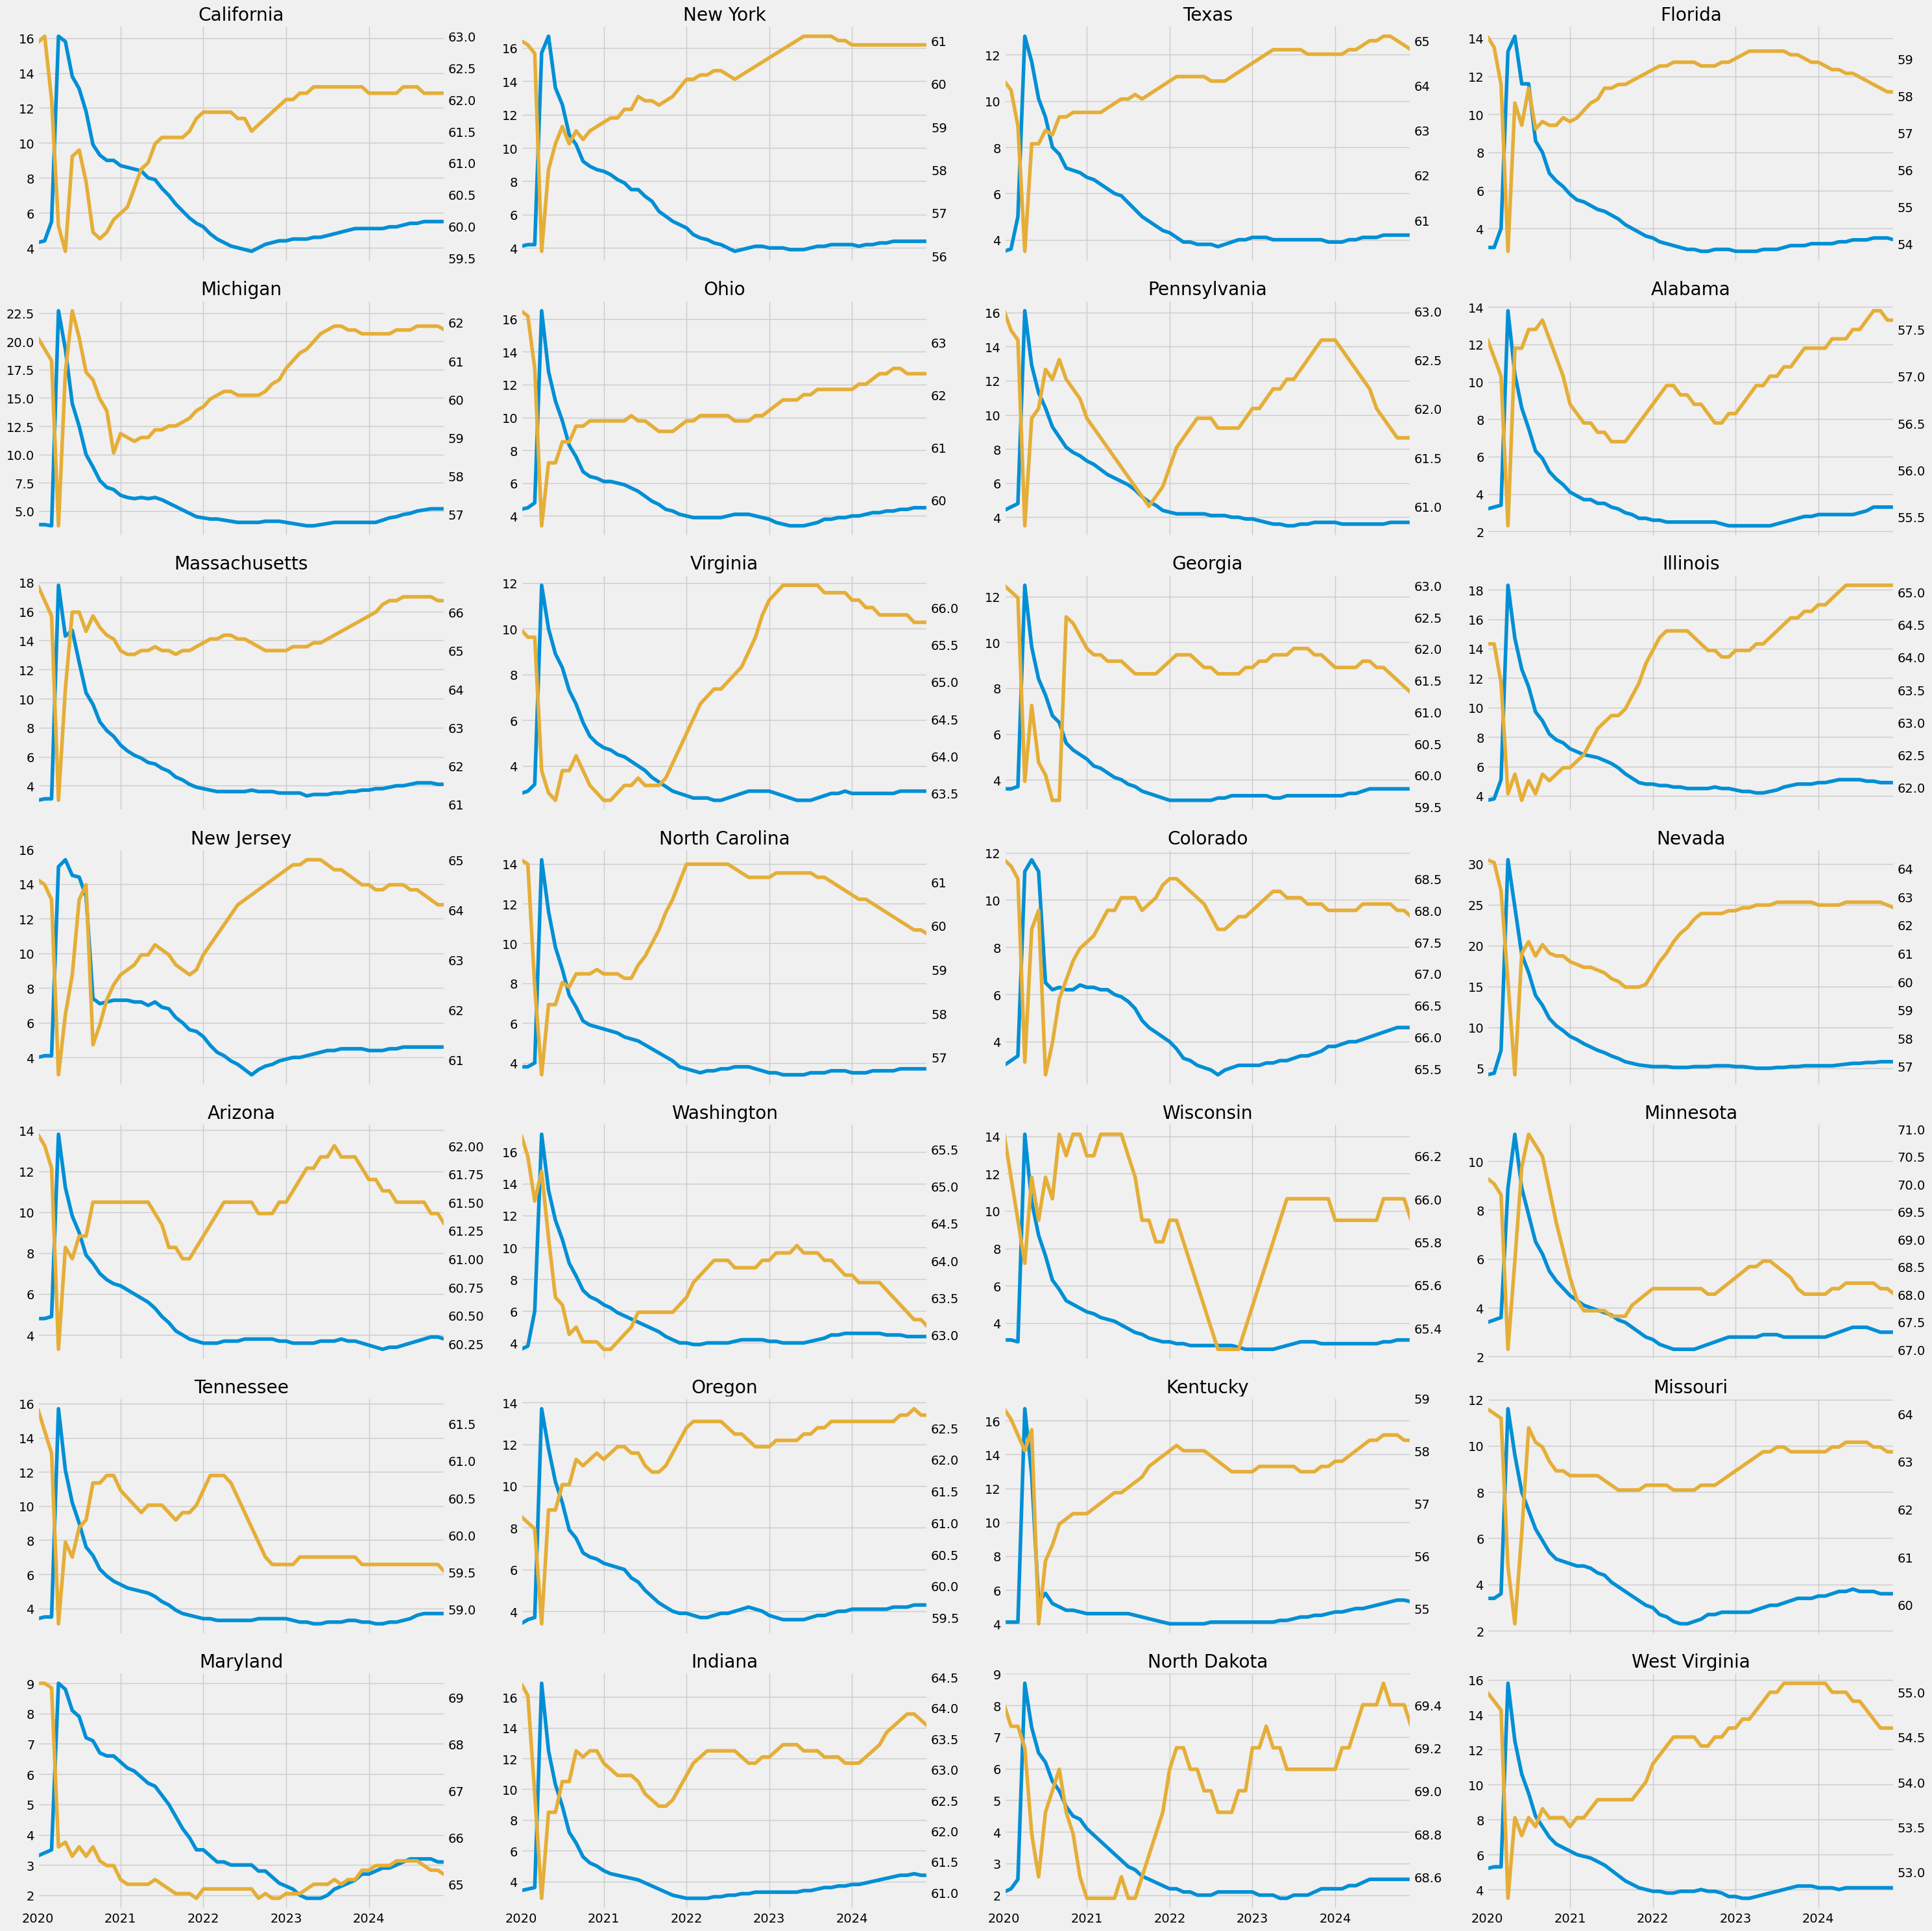

In [148]:
# Plotting Unemployment rate and Participation rate of each state from 2020 to 2025

figure, axs = plt.subplots(7,4, figsize=(30,30), sharex=True)
axs = axs.flatten()

i = 0
for states in df_unemployement_state.columns:
    ax2=axs[i].twinx()
    df_unemployement_state.query('index >= 2020 and index < 2025')[states].plot(ax=axs[i], label= 'Unemployment')
    df_participation_state.query('index >= 2020 and index < 2025')[states].plot(ax=ax2, label= 'Participation', color= color_pallete[2])
    ax2.grid(False)
    axs[i].set_title(states)
    i = i + 1
plt.tight_layout()
plt.show()
    
